# Modules to be imported

In [1]:
import comands as co
import load as ld
from fourier import * 
import matplotlib.pyplot as plt
from matplotlib import collections as mc

# Loading the data you need

In [2]:
Load = ld.LoadAndFind() # it is example how to laod data with module

We need noise level to plot on the graph 

In [3]:
noise = Load.noise

# Fourier transformation with fortran files (optional)

Difrent way to calculate fourier transform without python
 1. Uncoment below lines
 2. Evaluate function fourier_ transform from co modules to calculate fourier transform data
 3. Evaluate calculate_the_noise_level from co modules. If you want change the value (e.g. 3 * sigma) You mast go to comands file 

In [4]:
# co.fourier_transformation(' ./data/sdB93.dane') 

In [5]:
# noise = co.calculate_the_noise_level()

# Plotting data 

This generates an ipywidget that renders plots in a control. Multiple plots and zooming are supported.

In [6]:
%matplotlib widget

## Plotting chart with variable level noise

In [7]:
Split = ld.SplitData()

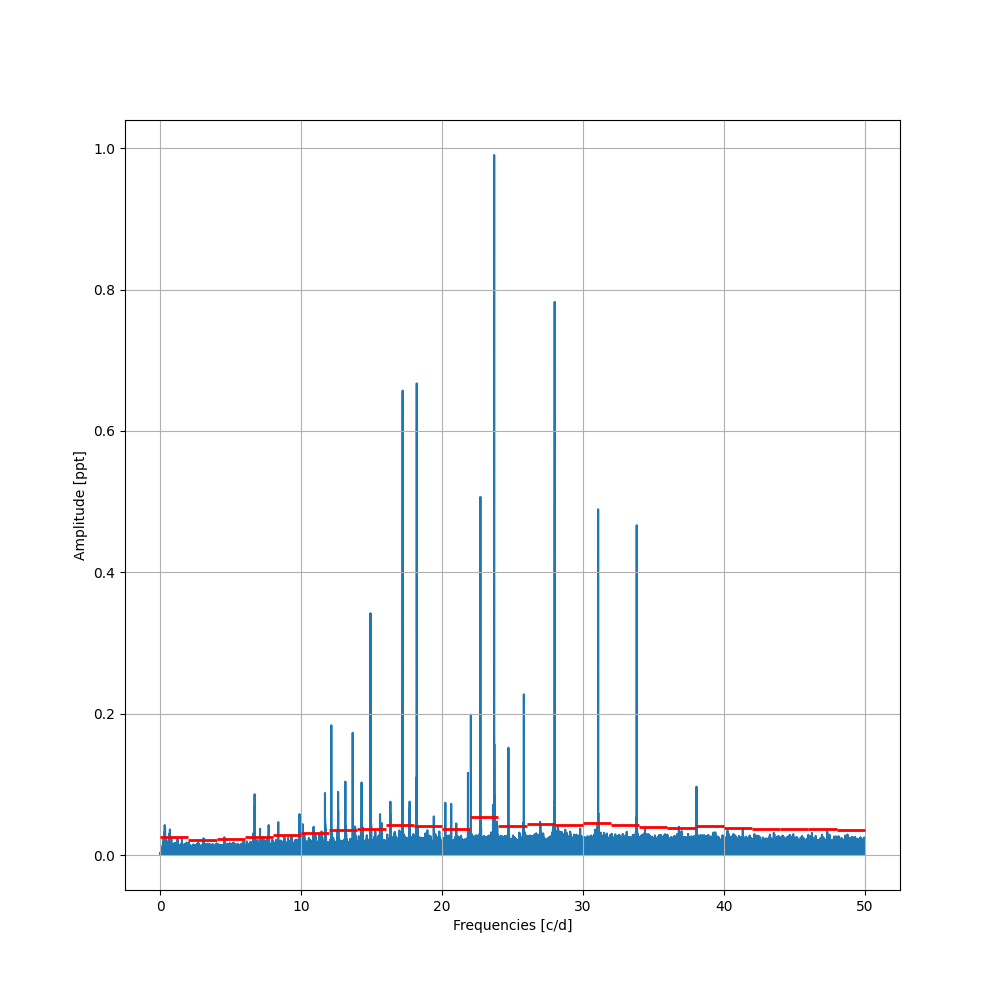

In [8]:
figure_0 = plt.figure(figsize=(10, 10))
axis_0 = figure_0.subplots()
axis_0.set(xlabel='Frequencies [c/d]', ylabel='Amplitude [ppt]')
lc = mc.LineCollection(Split.lines, colors='red', linewidths=2)
axis_0.add_collection(lc)
axis_0.autoscale()
axis_0.grid()
axis_0.plot(Load.frequencies, Load.ppt, zorder=-10)
plt.savefig('./output/transformat_fourier_frequencies_with_noise.eps', format='eps')

## Plotting chart with one level noise 


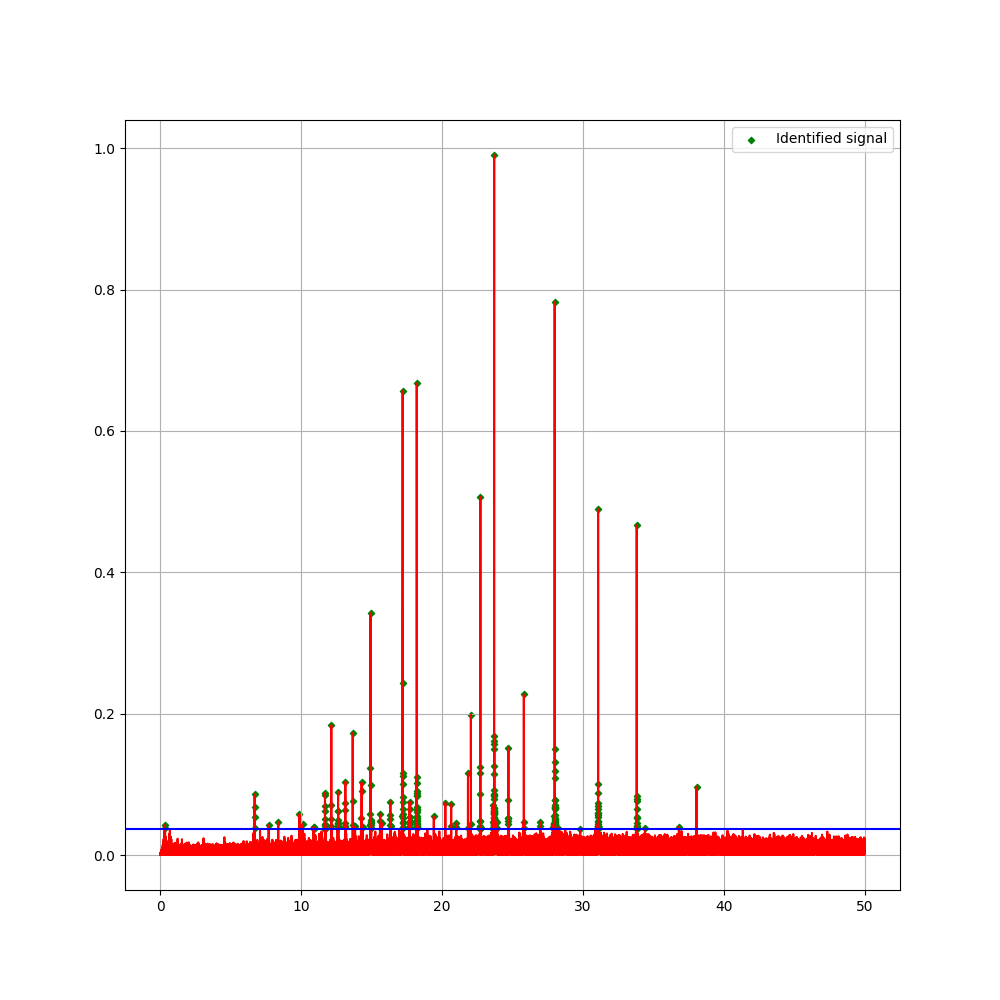

In [9]:
figure_1 = plt.figure(figsize=(10, 10)) #plotting maxima in frequencies
axis_1 = figure_1.subplots()
axis_1.plot(Load.frequencies, Load.ppt, color='red')
axis_1.scatter(Load.peak_position, Load.height, color='g', s=10, marker='D', label='Identified signal')
axis_1.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
axis_1.legend()
axis_1.grid()

##  Plotting maxima in periods

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


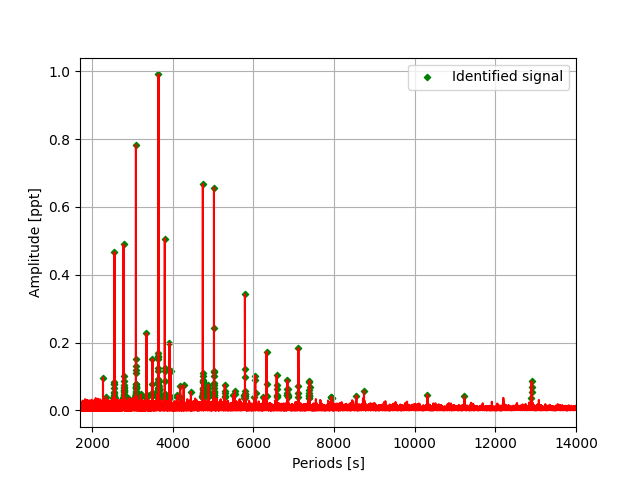

In [10]:
figure_2 = plt.figure()
axis_2 = figure_2.subplots()
axis_2.plot(Load.periods[-575000:], Load.ppt[-575000:], color='red')
axis_2.scatter(Load.peaks_periods[2:], Load.height[2:], color ='green', s =10, marker ='D', label ='Identified signal')
axis_2.set(xlabel='Periods [s]', ylabel='Amplitude [ppt]')
axis_2.set_xlim(1700,14000)
axis_2.legend()
axis_2.grid()
plt.savefig('identified_signal_in_period.eps', format='eps')

## Plotting histogram to all data 

In [11]:
Histograms = ld.DistanceAndHistograms()

load limiting data to histiogram for 20 sice 600 distance 

In [12]:
limiting_data = Histograms.limiting(20, 600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


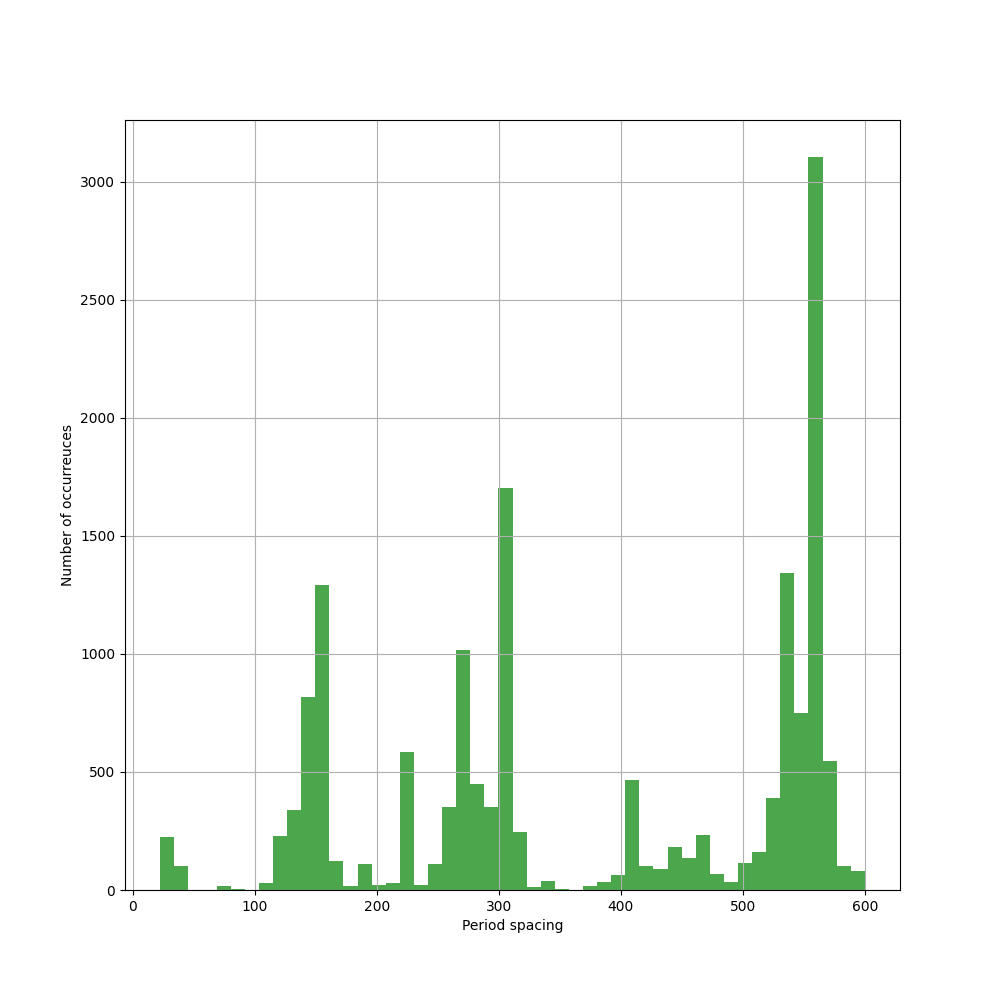

In [13]:
figure_3 = plt.figure(figsize=(10, 10))
axis_3 = figure_3.subplots()
axis_3.hist(limiting_data, bins=50, alpha=0.7, facecolor='green')
axis_3.set_xlabel('Period spacing')
axis_3.set_ylabel('Number of occurreuces')
axis_3.grid()
plt.savefig('./output/histogram_to_all_data.eps', format='eps')

## Potting histograms to $l_2$ (140 seconds distanse)

In [14]:
limiting_data_1 = Histograms.limiting(100, 300)

matching parameters

In [15]:
xfit_1, yfit_1, x0_1, sigma_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)

In [16]:
x0_1, sigma_1

(151.8635341546866, 8.095783563506698)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


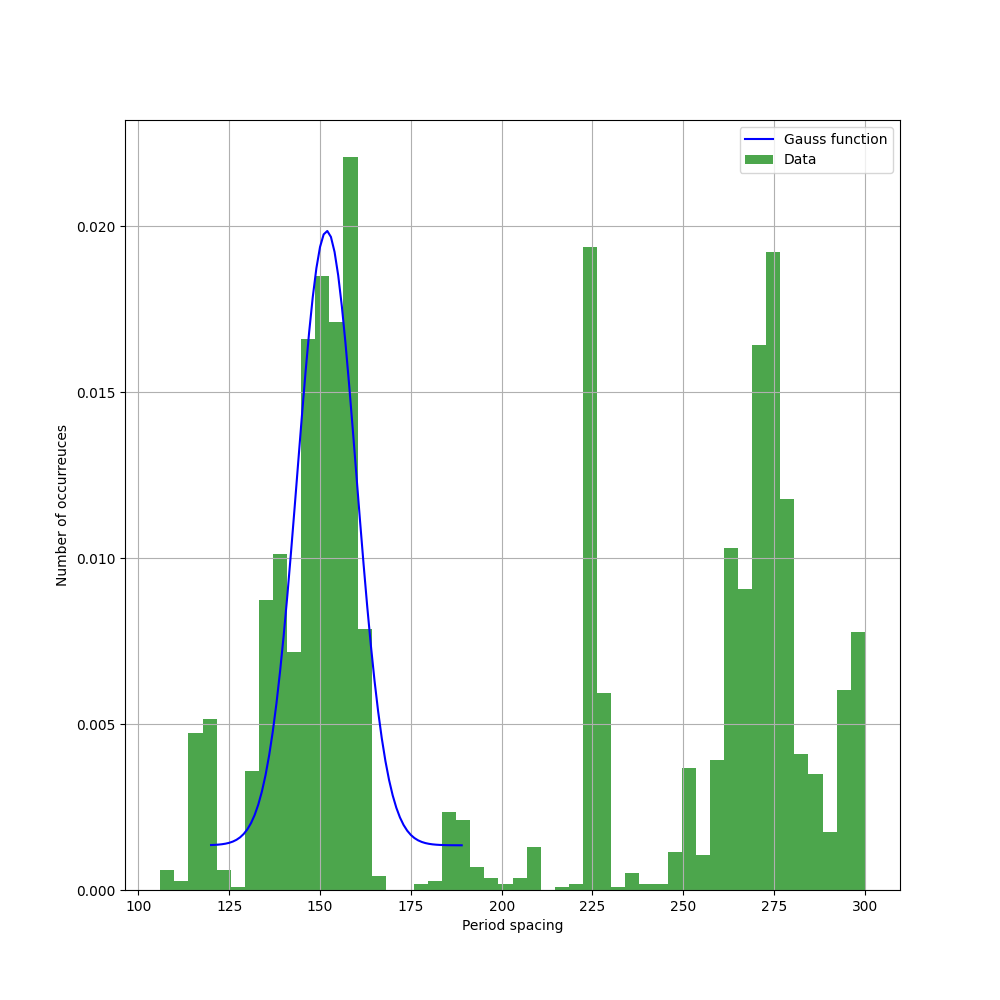

In [17]:
figure_4 = plt.figure(figsize=(10, 10)) #plotting result
axis_4 = figure_4.subplots()
axis_4.hist(limiting_data_1, bins=50, density=1, alpha=0.7, facecolor='green')
axis_4.plot(xfit_1, yfit_1, color='blue')
axis_4.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_4.grid()
axis_4.legend(labels=['Gauss function', 'Data'])
plt.savefig('./output/histogram_l2_gauss.eps', format='eps')

## Potting histograms to $l_1$ (250 seconds distanse)

In [18]:
limiting_data_2 = Histograms.limiting(200, 350)

matching parameters

In [19]:
xfit_2, yfit_2, x0_2, sigma_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)

In [20]:
x0_2, sigma_2

(272.715675449241, 5.8470500684475315)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


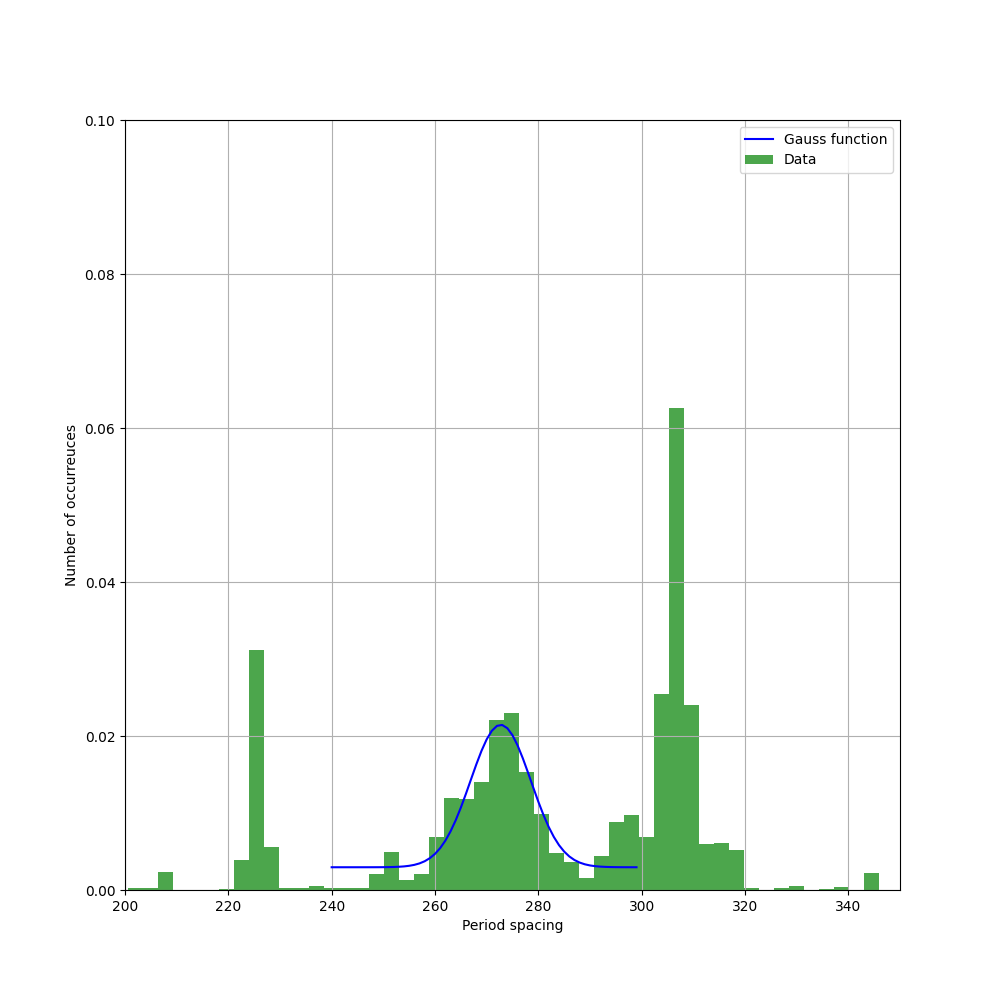

In [21]:
figure_5 = plt.figure(figsize=(10, 10)) #plotting result
axis_5 = figure_5.subplots()
axis_5.hist(limiting_data_2, bins=50, density=1, alpha=0.7, facecolor='green')
axis_5.plot(xfit_2, yfit_2, color='blue')
axis_5.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_5.set_xlim(200, 350)
axis_5.set_ylim(0, 0.1)
axis_5.grid()
axis_5.legend(labels=['Gauss function', 'Data'])
plt.savefig('./output/histogram_l1_gauss.eps', format='eps')

## Potting histograms to $l_3$ if exist (80 seconds distanse)

In [22]:
limiting_data_3 = Histograms.limiting(50, 100)

matching parameters

In [23]:
xfit_3, yfit_3, x0_3, sigma_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)

In [24]:
x0_3, sigma_3

(78.2219034700897, 1.5189422086986388)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


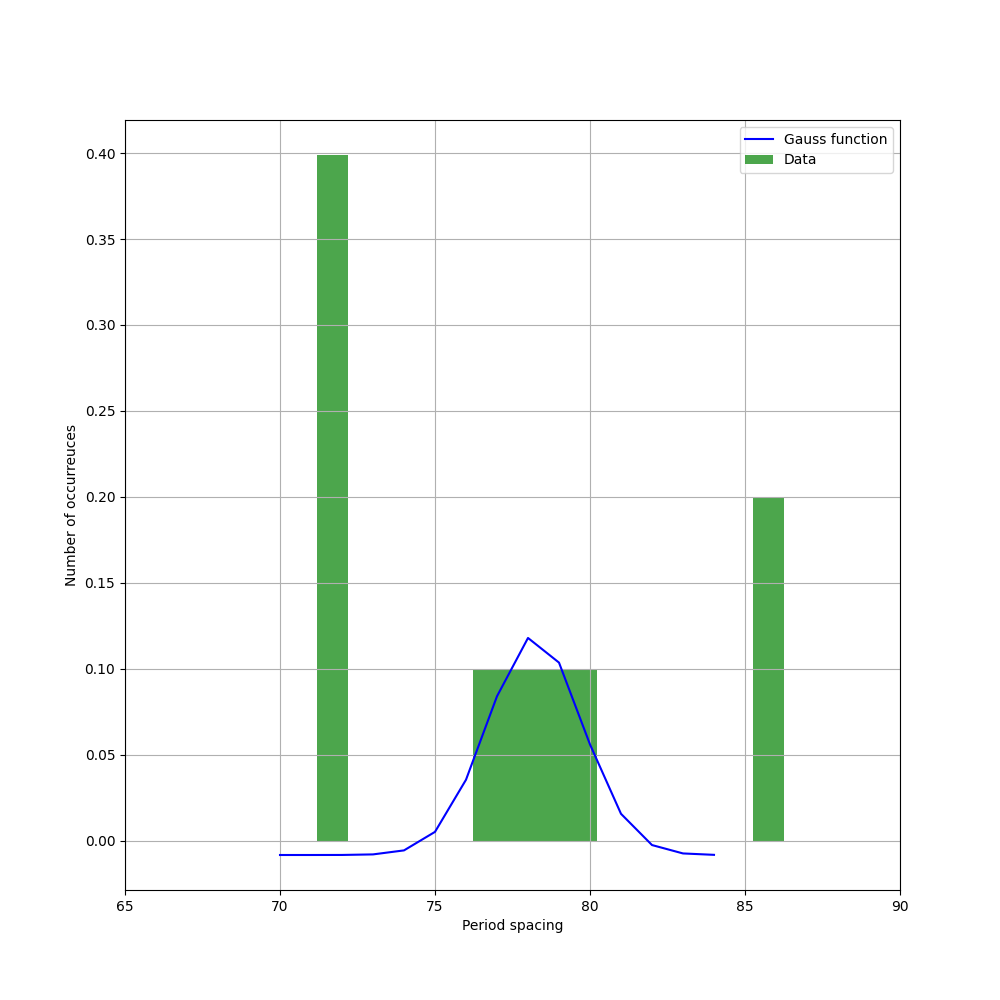

In [25]:
figure_6 = plt.figure(figsize=(10, 10)) #plotting result
axis_6 = figure_6.subplots()
axis_6.hist(limiting_data_3, bins=15, density=1, alpha=0.7, facecolor='green')
axis_6.plot(xfit_3, yfit_3, color='blue')
axis_6.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_6.grid()
axis_6.legend(labels=['Gauss function', 'Data'])
axis_6.set_xlim([65, 90])
plt.savefig('./output/histogram_l3_gauss.eps', format='eps')

# Assigning the values of $l_1$, $l_2$ and $l_3$ to the individual peaks

In [26]:
lista = ld.Mods(x0_1, sigma_1, x0_2, sigma_2, x0_3, sigma_3, Load.peaks_periods)
lista = lista[0]

c:\Users\Lenovo\Desktop\Github\identification-of-sdBV-star-pulsed-modes-project\main\load.py:215: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  self.List_filtred_latex = self.List_reset.to_latex(index=True)


In [27]:
l_1 = lista.loc[lambda lista: lista[3] == '1 ']
L_1 = list(l_1[1])
l_2 = lista.loc[lambda lista: lista[3] == '2 ']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


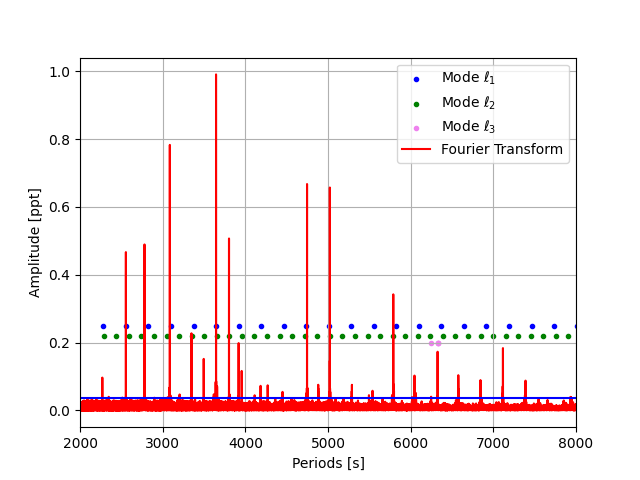

In [28]:
figure_2 = plt.figure() #plotting axis x form data in periods
ax1 = figure_2.subplots()


el1x= l_2[1]
#el1y=[0.25] * len(el1x)
el1x_do_petli = el1x[0]
el1x_do1 = []
el1y = []

for i in range(64):
    el1x_do1.append((3645.617326 - 5 * 272.62)+ i * 272.62)
    el1y.append(0.25)

el2x= l_1[1]
# el2y=[0.22] * len(el2x)
el2y = []
el2x_do_petli = 5022.27539 - 18 * 151.92
el2x_do1 = []

for i in range(56):
    el2x_do1.append(el2x_do_petli + i * 151.92)
    el2y.append(0.22)

el3x = [6327.057121, 6326.45094, 6325.773764, 6247.705573]
el3y = [0.20] * 4

ax1.scatter(el1x_do1,el1y, marker='.', color='blue', label='Mode $\ell_1$')
ax1.scatter(el2x_do1,el2y, marker='.', color='green', label='Mode $\ell_2$')
ax1.scatter(el3x,el3y, marker='.', color='violet', label='Mode $\ell_3$')
ax1.plot(Load.periods[-590000:], Load.ppt[-590000:], label='Fourier Transform', color='red')
ax1.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
ax1.set_xlim([2000, 8000])


ax1.grid()
ax1.set_xlabel("Periods [s]")
ax1.set_ylabel("Amplitude [ppt]")
ax1.legend()
plt.savefig('./output/ladder.eps', format='eps')
plt.show()

# Corfirmation of correct designation 

In [29]:
Confirm = ld.Confirm()

In [30]:
load_data = Confirm.run_fourier_transformation_to_confirm

In [33]:
load_data

<bound method Confirm.run_fourier_transformation_to_confirm of <load.Confirm object at 0x00000222473D7400>>

plotting axis x form data in periods

In [ ]:
figure_7 = plt.figure()
axis_7 = figure_7.subplots()
# axis_7.set_ylim(0,0.009)
axis_7.set_xlim(0, 0.014)
axis_7.axvline(x=1 / 158, color='b', linestyle='-', linewidth=1, label = '$\sigma_{1}$')
axis_7.axvline(x=1 / 280, color='g', linestyle='-', linewidth=1, label = '$\sigma_{2}$')
# axis_7.axvline(x=1 / 102.8, color='orange', linestyle='-', linewidth=1, label = '$\sigma_{3b}$')
axis_7.set_xlabel('Fourier transform from seconds dependent amplitude spectrum for frequency [s]')
axis_7.set_ylabel('Amplitude [ppt]')
axis_7.legend()
axis_7.grid()
axis_7.plot(load_data[0], load_data[1], color='red')
plt.savefig('./output/2nd_ft.eps', format='eps')